Amazon Top 50 Bestselling Books 2009–2019

Import Libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Data

In [8]:
amazon_df = pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\Amazon\bestsellers.csv')

Explore the Data

In [13]:
amazon_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [15]:
amazon_df.shape

(550, 7)

In [17]:
amazon_df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [19]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [21]:
amazon_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [23]:
amazon_df.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

Clean the Data

In [26]:
amazon_df.duplicated().sum()

0

In [28]:
amazon_df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [32]:
amazon_df.columns = [col.lower().replace(" ", "_") for col in amazon_df.columns]
amazon_df.head()

,name,author,user_rating,reviews,price,year,genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [36]:
amazon_df['genre'].unique()
amazon_df['year'].unique()

array([2016, 2011, 2018, 2017, 2019, 2014, 2010, 2009, 2015, 2013, 2012],
      dtype=int64)

Visuals Using Matplotlib

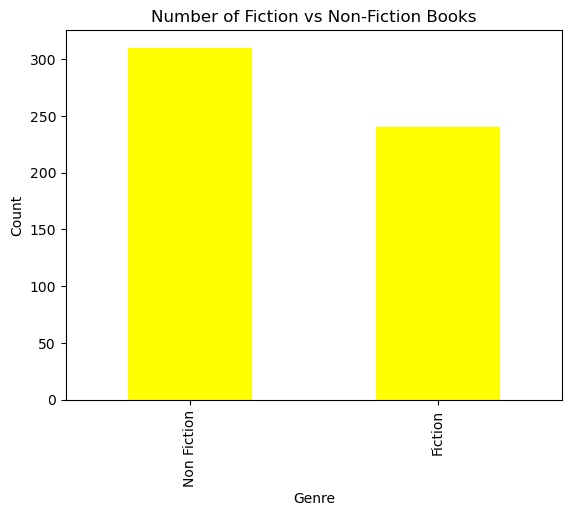

In [43]:
amazon_df['genre'].value_counts().plot(kind='bar', color='yellow')
plt.title('Number of Fiction vs Non-Fiction Books')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.grid(False)
plt.show()

Top 10 Most Frequent Authors

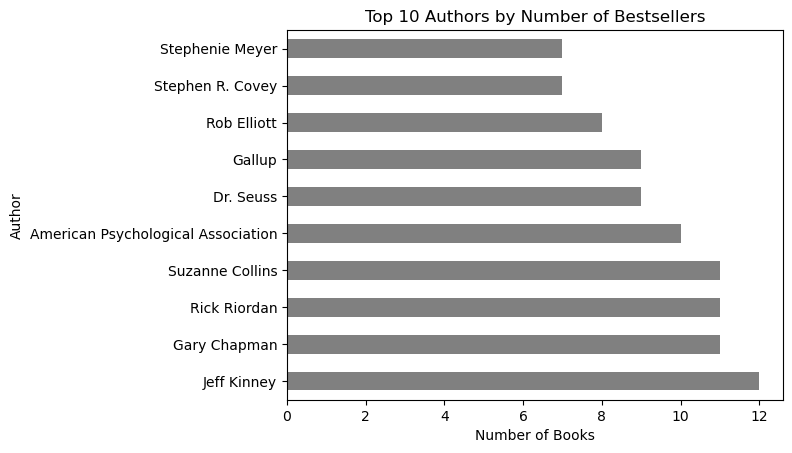

In [50]:
amazon_df['author'].value_counts().head(10).plot(kind='barh',color='grey')
plt.title('Top 10 Authors by Number of Bestsellers')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.show()

Price Distribution of Books

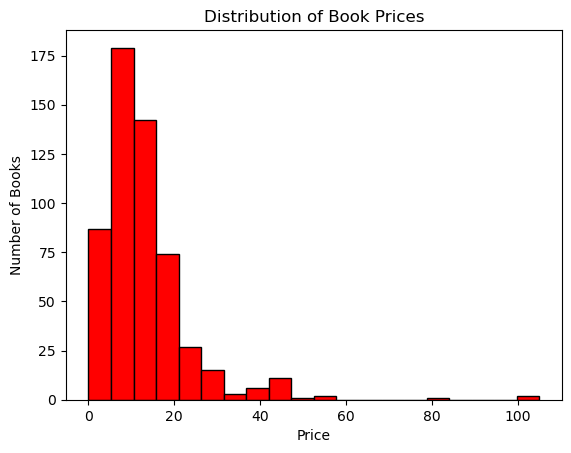

In [65]:
amazon_df['price'].plot(kind='hist', bins=20, color='red', edgecolor='black')
plt.title('Distribution of Book Prices')
plt.xlabel('Price')
plt.ylabel('Number of Books')
plt.show()


Top 10 Most Reviewed Books

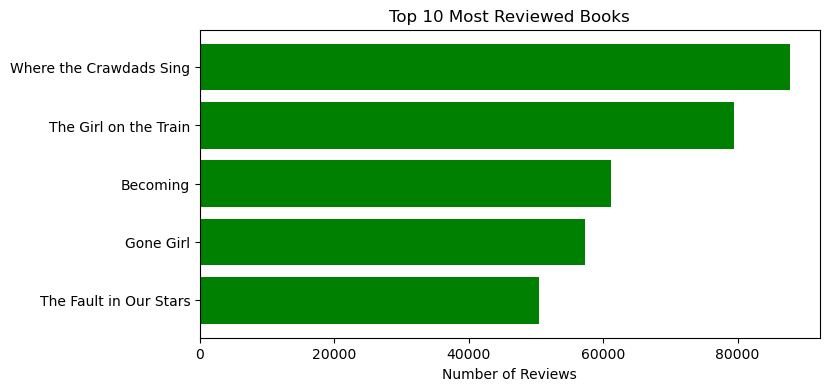

In [83]:
reviews = amazon_df.sort_values(by='reviews', ascending=False).head(10)
plt.figure(figsize=(8,4))
plt.barh(reviews['name'], reviews['reviews'], color='green')
plt.title('Top 10 Most Reviewed Books')
plt.xlabel('Number of Reviews')
plt.gca().invert_yaxis()
plt.show()


In [91]:
amazon_df.to_csv(r'C:\Users\navee\OneDrive\Desktop\cleaned_amazon_bestsellers.csv', index=False)